<a href="https://colab.research.google.com/github/RozenkovAndrey/projects_of_yandex_practicum/blob/main/Credits/Credits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
!gdown --id 1nblIwJyqINMcwbyYCdYVkc1HiXzpX5nt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1nblIwJyqINMcwbyYCdYVkc1HiXzpX5nt
To: /content/data.csv
100% 3.32M/3.32M [00:00<00:00, 194MB/s]


# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

In [71]:
import pandas as pd
import numpy as np

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [72]:
import warnings
warnings.simplefilter("ignore")

In [73]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [75]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [76]:
ab = data

In [77]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [78]:
data['days_employed'] = data['days_employed'].abs()

In [79]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

In [80]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [81]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [82]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

In [83]:
import warnings
warnings.simplefilter("ignore")

for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [84]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [85]:
import warnings
warnings.simplefilter("ignore")

data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [86]:
import warnings
warnings.simplefilter("ignore")

data['education'] = data['education'].str.lower()

In [87]:
data.duplicated().sum()

71

In [88]:
data = data.drop_duplicates()

### Категоризация данных

In [89]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [90]:
import warnings
warnings.simplefilter("ignore")

data['total_income_category'] = data['total_income'].apply(categorize_income)

In [91]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [92]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [93]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

children
0    1063
1     444
2     194
3      27
4       4
5       0
Name: debt, dtype: int64
children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64


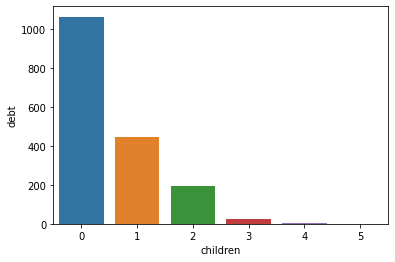

In [94]:
import seaborn as sns

# Группирую по количеству детей и считаю количество задолженостей по группам
df = data.groupby('children')['debt'].sum() 
print(df)

# Группирую по количеству детей и считаю общее количество значений столбца наличие задолженности по группам
df1 = data.groupby('children')['debt'].count() 
print(df1)

# Вывожу количество задолженностей по группам 
sns.barplot(x = df.index, y = df)

children
4    9.76
2    9.45
1    9.23
3    8.18
0    7.54
5    0.00
Name: debt, dtype: float64


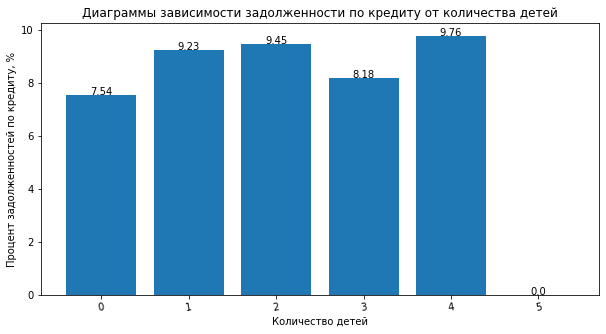

In [95]:
#Считаю процент задержек по платежу кредита в зависимости от количества детей и строю диаграммы
df3 = df/df1
df3 = df3*100
df3 = np.round(df3, decimals = 2)
df3 = df3.sort_values(ascending = False)
print(df3)

#import seaborn as sns
#sns.barplot(x = df3.index, y = df3)


# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  

      
    # setting figure size by using figure() function 
plt.figure(figsize = (10, 5))
      
    # making the bar chart on the data
plt.bar(df3.index, df3)

plt.xticks(rotation=10)
      
    # calling the function to add value labels
addlabels(df3.index, df3)
      
    # giving title to the plot
plt.title("Диаграммы зависимости задолженности по кредиту от количества детей")
      
    # giving X and Y labels
plt.xlabel("Количество детей")
plt.ylabel("Процент задолженностей по кредиту, %")
      
    # visualizing the plot
plt.show()


**Вывод:** Меньше всего процент задержек у людей, у кого нет детей. В группе с 5-ю детьми мало значений (всего 9), поэтому каждое следующее добавленной значение с задержкой по платежу будет иметь большой вес и эту группу нельзя рассматривать в качестве сравнения с другими группами.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [96]:
# Группирую по семейному статусу и считаю количество задолженостей по группам

# Вывожу количество задолженностей по группам 

df4 = data.groupby('family_status')['debt'].sum().sort_values(ascending = False).copy()
df5 = pd.DataFrame({'family_status':df4.index, 'count_status':df4.values})
print(df5)

#ax = sns.barplot(x = df4, y = df4.index)

from typing import ValuesView
import plotly.express as px

fig = px.bar(df5, x='family_status', y='count_status', width=800, height=400,
             labels={'x': 'family_status', 'y':'count_status'},
             title="Распределеиня количества возвратов кредита от семейного положения")


fig.show()



           family_status  count_status
0        женат / замужем           927
1       гражданский брак           385
2  Не женат / не замужем           273
3              в разводе            84
4         вдовец / вдова            63


In [97]:
import numpy as np
# Группирую по семейному статусу и считаю общее количество значений столбца наличие задолженности по группам
df6 = data.groupby('family_status')['debt'].count()

#Считаю процент задержек по платежу кредита в зависимости от семейного статуса и строю диаграммы
df7 = df4/df6
df7 = df7*100
df7 = np.round(df7, decimals = 2)
df7 = df7.sort_values(ascending = False)
print(df7)

family_status
Не женат / не замужем    9.76
гражданский брак         9.31
женат / замужем          7.56
в разводе                7.06
вдовец / вдова           6.62
Name: debt, dtype: float64


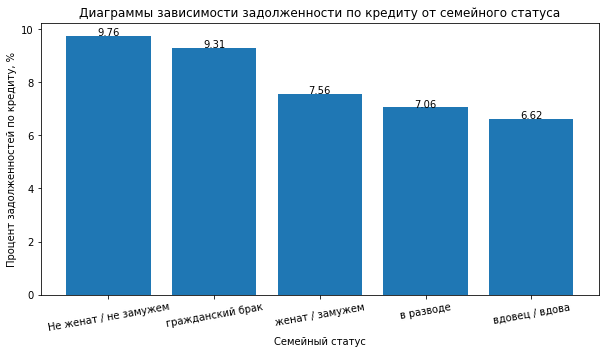

In [98]:
# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  

      
    # setting figure size by using figure() function 
plt.figure(figsize = (10, 5))
      
    # making the bar chart on the data
plt.bar(df7.index, df7)

plt.xticks(rotation=10)
      
    # calling the function to add value labels
addlabels(df7.index, df7)
      
    # giving title to the plot
plt.title("Диаграммы зависимости задолженности по кредиту от семейного статуса")
      
    # giving X and Y labels
plt.xlabel("Семейный статус")
plt.ylabel("Процент задолженностей по кредиту, %")
      
    # visualizing the plot
plt.show()





**Вывод:**  Более всего задержек по вплате кредита у не женатых/на замужних людей и живущих в гражданском браке.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [99]:
# Группирую по категории получаемой заработной платы и считаю общее количество значений столбца наличие задолженности по группам

df8 = data.groupby('total_income_category')['debt'].sum().copy()
print(df8)

#Считаю процент задержек по платежу кредита в зависимости от семейного статуса и строю диаграммы
df9 = data.groupby('total_income_category')['debt'].count() 
print(df9)

df10 = df8/df9
df10 = df10*100
print(df10)

total_income_category
A       2
B     354
C    1353
D      21
E       2
Name: debt, dtype: int64
total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64
total_income_category
A    8.000000
B    7.060231
C    8.498210
D    6.017192
E    9.090909
Name: debt, dtype: float64


total_income_category
E    9.09
C    8.50
A    8.00
B    7.06
D    6.02
Name: debt, dtype: float64


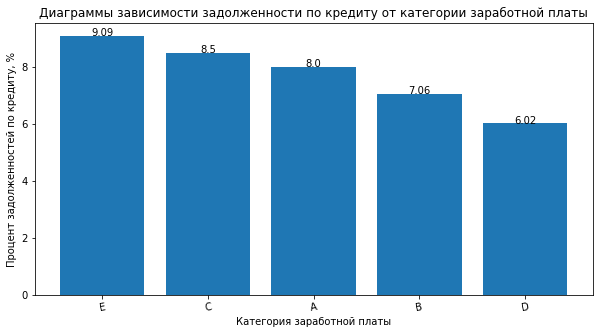

In [100]:
import numpy as np
df10 = np.round(df10, decimals = 2)
df10 = df10.sort_values(ascending = False)
print(df10)

# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
       
    # setting figure size by using figure() function 
plt.figure(figsize = (10, 5))
      
    # making the bar chart on the data
plt.bar(df10.index, df10)

plt.xticks(rotation=10)
      
    # calling the function to add value labels
addlabels(df10.index, df10)
      
    # giving title to the plot
plt.title("Диаграммы зависимости задолженности по кредиту от категории заработной платы")
      
    # giving X and Y labels
plt.xlabel("Категория заработной платы")
plt.ylabel("Процент задолженностей по кредиту, %")
      
    # visualizing the plot
plt.show()

In [101]:
# Диапазон зарплат по категориям
#'E': 0 -30000:
#'D': 30001 - 50000
#'C': 50001 - 200000           
#'B': 200001 - 1000000        
#'A': >= 1000001           

**Вывод:** Линейной зависимости между уровем заработной платы и задержками по кредиту почти нет, значения А и Е не имеют статичтической значимости, поскольку количество значений из выборки не превышает 30 и каждое следующее значение с задолженностью превносит существенные изменения в процент невозврата по кредиту в группе. Наименьший процент просрочек по выплате кредита в группе D. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [102]:
# Группирую по категории цели кредита и считаю общее количество значений столбца наличие задолженности по группам

df11 = data.groupby('purpose_category')['debt'].sum().copy()
print(df11)

#Считаю процент задержек по платежу кредита в зависимости от семейного статуса и строю диаграммы
df12 = data.groupby('purpose_category')['debt'].count() 
print(df12)

df13 = df11/df12
df13 = df13*100
print(df13)

purpose_category
операции с автомобилем      400
операции с недвижимостью    780
получение образования       369
проведение свадьбы          183
Name: debt, dtype: int64
purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64
purpose_category
операции с автомобилем      9.347978
операции с недвижимостью    7.255139
получение образования       9.252758
проведение свадьбы          7.911803
Name: debt, dtype: float64


purpose_category
операции с автомобилем      9.35
получение образования       9.25
проведение свадьбы          7.91
операции с недвижимостью    7.26
Name: debt, dtype: float64


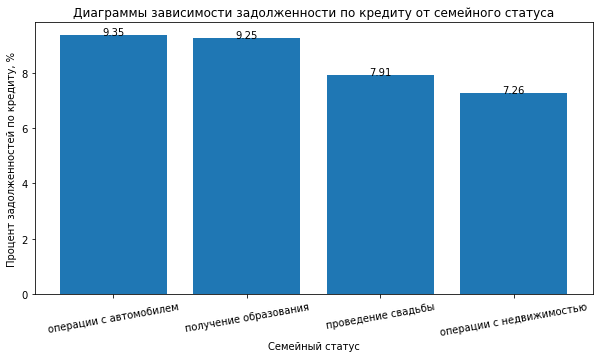

In [103]:
import numpy as np
df13 = np.round(df13, decimals = 2)
df13 = df13.sort_values(ascending = False)
print(df13)

# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
       
    # setting figure size by using figure() function 
plt.figure(figsize = (10, 5))
      
    # making the bar chart on the data
plt.bar(df13.index, df13)

plt.xticks(rotation=10)
      
    # calling the function to add value labels
addlabels(df13.index, df13)
      
    # giving title to the plot
plt.title("Диаграммы зависимости задолженности по кредиту от семейного статуса")
      
    # giving X and Y labels
plt.xlabel("Семейный статус")
plt.ylabel("Процент задолженностей по кредиту, %")
      
    # visualizing the plot
plt.show()

**Вывод:** На операции с неджижимостью и проведение свадьбы процент задержек по выплате кредита меньше, чем на покупку автомобиля и получение образования.

#### Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
Количество пропусков о рабочем времени и заработной плате совпадает.
Эти два столбца взаимосвязаны между собой и если не будет данных в столбце о времени работы, то не будет
данных и в столбце заработной плате. Можно предположить, что пустые значения по отработанному времени
равны нулю, так как есть люди, которые вообще не работают в жизни и имеют либо пассивный доход либо содержанки, 
либо богатых родителей и наследство и видимо хотят ещё и кредит взять. Не исключено, что пропуски в данных
допущены по причине того, что их просто не заполнили или они отсутствуют. Также логично подумать,
что клиенты специально могут скрывать эти данные, желая поскорее получить кредит.

Кроме того, может быть и технический фактор и данные могли потеряться при передачи информации и работе с ней.

Два основных фактора потери информации - это: человеческий и технический.



*Ответ:* 
-простой метод (относительно бутстапа)
-выбранное значение менее подвержено зависимости от выбросов, чем среднее

### Общий вывод

При группировке клиентов по количеству детей можно сделать вывод, что наиболее надежными по возврату кредита клиентами являеются люди без детей. Процент не возврата кредита по этой категории составляет 7,54%. Наименее надежная: родители 4х детей процент невозврата - 9.76%. Для оценки категории родителей с 5-ю детьми необходимо больше данных.

Наиболее надежной категорией среди клиентов по семейному статусу являются вдовы/вдовцы  с процентом задержки по кредиту 6.62%. Наименее надежные - женатые/замужние. Их процент задержек по кредиту составляет 9.76%.

Наиболее надежной категорией среди клиентов по уровню дохода являются клиенты с уровенм дохода D -  процент задолженности 6,02%. Наименее надежные - с категорией C. Их процент задолженности составляет 8.5%.

Наиболее надежной категорией среди клиентов по целям для кредита являются те, кто берет кредит на операции с недвижимостью - процент задолженности в этой группе -7.26%. Наименее надежные - категория с операциями с автомобилем. Их процент задолженности составляет 9.35%.